In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
data = pd.read_csv(url)

data

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [29]:
data = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
data['churn'] = data['churn'].astype('int')
data

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


In [5]:
X = np.asarray(data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(data[['churn']])
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [7]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X_norm, y, train_size=0.2, random_state=42)

In [10]:
LR = LogisticRegression().fit(X_train, y_train)

In [16]:
y_ = LR.predict(X_test) #fazer a predição do conjunto de teste
y_[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [18]:
y_prob = LR.predict_proba(X_test) #probabilidade de ser classe 1 ou 0 
y_prob

array([[0.41983583, 0.58016417],
       [0.07249685, 0.92750315],
       [0.847422  , 0.152578  ],
       [0.64121206, 0.35878794],
       [0.87637908, 0.12362092],
       [0.15042909, 0.84957091],
       [0.99739313, 0.00260687],
       [0.52581162, 0.47418838],
       [0.42109183, 0.57890817],
       [0.97523835, 0.02476165],
       [0.9745769 , 0.0254231 ],
       [0.97206243, 0.02793757],
       [0.86681073, 0.13318927],
       [0.98974155, 0.01025845],
       [0.26139633, 0.73860367],
       [0.95164893, 0.04835107],
       [0.66586496, 0.33413504],
       [0.32064825, 0.67935175],
       [0.77708149, 0.22291851],
       [0.64378109, 0.35621891],
       [0.98660234, 0.01339766],
       [0.38477073, 0.61522927],
       [0.10588623, 0.89411377],
       [0.2877069 , 0.7122931 ],
       [0.81883637, 0.18116363],
       [0.98898651, 0.01101349],
       [0.37572076, 0.62427924],
       [0.97224023, 0.02775977],
       [0.98754453, 0.01245547],
       [0.91108617, 0.08891383],
       [0.

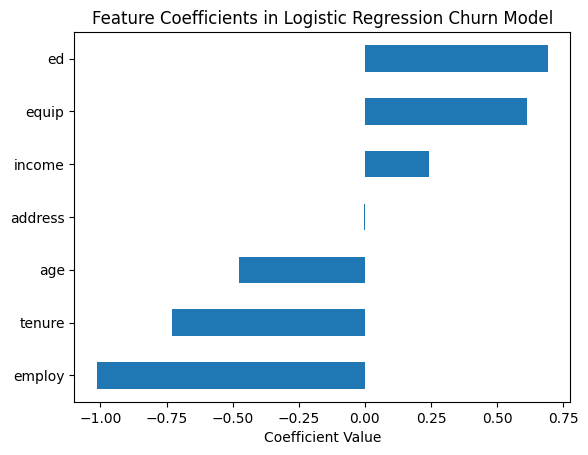

In [21]:
coefficients = pd.Series(LR.coef_[0], index=data.columns[:-1]) #grafico que mostra a relaççao entre as features e a classificação
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [28]:
#Avaliando a performace, quanto menor o log loss melhor o modelo
log_loss(y_test, y_prob)

0.5541394456949478